In [3]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
#from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [5]:
url = 'http://commondatastorage.googleapis.com/books1000/'
last_percent_reported = None
data_root = '.' # Change me to store data elsewhere

def download_progress_hook(count, blockSize, totalSize):
  """A hook to report the progress of a download. This is mostly intended for users with
  slow internet connections. Reports every 5% change in download progress.
  """
  global last_percent_reported
  percent = int(count * blockSize * 100 / totalSize)

  if last_percent_reported != percent:
    if percent % 5 == 0:
      sys.stdout.write("%s%%" % percent)
      sys.stdout.flush()
    else:
      sys.stdout.write(".")
      sys.stdout.flush()
      
    last_percent_reported = percent
        
def maybe_download(filename, expected_bytes, force=False):
  """Download a file if not present, and make sure it's the right size."""
  dest_filename = os.path.join(data_root, filename)
  if force or not os.path.exists(dest_filename):
    print('Attempting to download:', filename) 
    filename, _ = urlretrieve(url + filename, dest_filename, reporthook=download_progress_hook)
    print('\nDownload Complete!')
  statinfo = os.stat(dest_filename)
  if statinfo.st_size == expected_bytes:
    print('Found and verified', dest_filename)
  else:
    raise Exception(
      'Failed to verify ' + dest_filename + '. Can you get to it with a browser?')
  return dest_filename

train_filename = maybe_download('notMNIST_large.tar.gz', 247336696)
test_filename = maybe_download('notMNIST_small.tar.gz', 8458043)

Found and verified ./notMNIST_large.tar.gz
Found and verified ./notMNIST_small.tar.gz


In [6]:
num_classes = 10
np.random.seed(133)

def maybe_extract(filename, force=False):
  root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz
  if os.path.isdir(root) and not force:
    # You may override by setting force=True.
    print('%s already present - Skipping extraction of %s.' % (root, filename))
  else:
    print('Extracting data for %s. This may take a while. Please wait.' % root)
    tar = tarfile.open(filename)
    sys.stdout.flush()
    tar.extractall(data_root)
    tar.close()
  data_folders = [
    os.path.join(root, d) for d in sorted(os.listdir(root))
    if os.path.isdir(os.path.join(root, d))]
  if len(data_folders) != num_classes:
    raise Exception(
      'Expected %d folders, one per class. Found %d instead.' % (
        num_classes, len(data_folders)))
  print(data_folders)
  return data_folders
  
train_folders = maybe_extract(train_filename)
test_folders = maybe_extract(test_filename)

./notMNIST_large already present - Skipping extraction of ./notMNIST_large.tar.gz.
['./notMNIST_large/A', './notMNIST_large/B', './notMNIST_large/C', './notMNIST_large/D', './notMNIST_large/E', './notMNIST_large/F', './notMNIST_large/G', './notMNIST_large/H', './notMNIST_large/I', './notMNIST_large/J']
./notMNIST_small already present - Skipping extraction of ./notMNIST_small.tar.gz.
['./notMNIST_small/A', './notMNIST_small/B', './notMNIST_small/C', './notMNIST_small/D', './notMNIST_small/E', './notMNIST_small/F', './notMNIST_small/G', './notMNIST_small/H', './notMNIST_small/I', './notMNIST_small/J']


In [7]:
def display_image(folders):
    for folder in folders:
        image_files = os.listdir(folder)
        for i in range(10):
            image = image_files[i]
            full_filename = os.path.join(folder, image)
            print(full_filename)
            display(Image(filename=full_filename))
    

display_image(train_folders)
display_image(test_folders)

./notMNIST_large/A/QmFza2VydmlsbGVPbGRGYWNTQ0Qub3Rm.png


./notMNIST_large/A/QXJpYWxNVC5vdGY=.png


./notMNIST_large/A/VmVyYWNydXotTGlnaHQub3Rm.png


./notMNIST_large/A/TUNlbnR1cnlTY2hvb2xib29rLUJvbGQub3Rm.png


./notMNIST_large/A/Qm9zdG9uQmxhY2sgSXRhbGljLnR0Zg==.png


./notMNIST_large/A/Um9tYW5GaXhlZC13aWR0aC50dGY=.png


./notMNIST_large/A/S2VwbGVyU3RkLVNlbWlib2xkSXQub3Rm.png


./notMNIST_large/A/UnViYmVybWFpZC1TaW5nbGUub3Rm.png


./notMNIST_large/A/T2ZmaWNpbmFTYW5zRUYtQm9sZC5vdGY=.png


./notMNIST_large/A/VGV1dG9uSGVsbC5vdGY=.png


./notMNIST_large/B/QmFza2VydmlsbGVPbGRGYWNTQ0Qub3Rm.png


./notMNIST_large/B/QXJpYWxNVC5vdGY=.png


./notMNIST_large/B/VmVyYWNydXotTGlnaHQub3Rm.png


./notMNIST_large/B/TUNlbnR1cnlTY2hvb2xib29rLUJvbGQub3Rm.png


./notMNIST_large/B/Qm9zdG9uQmxhY2sgSXRhbGljLnR0Zg==.png


./notMNIST_large/B/Um9tYW5GaXhlZC13aWR0aC50dGY=.png


./notMNIST_large/B/S2VwbGVyU3RkLVNlbWlib2xkSXQub3Rm.png


./notMNIST_large/B/UnViYmVybWFpZC1TaW5nbGUub3Rm.png


./notMNIST_large/B/T2ZmaWNpbmFTYW5zRUYtQm9sZC5vdGY=.png


./notMNIST_large/B/VGV1dG9uSGVsbC5vdGY=.png


./notMNIST_large/C/QmFza2VydmlsbGVPbGRGYWNTQ0Qub3Rm.png


./notMNIST_large/C/QXJpYWxNVC5vdGY=.png


./notMNIST_large/C/VmVyYWNydXotTGlnaHQub3Rm.png


./notMNIST_large/C/TUNlbnR1cnlTY2hvb2xib29rLUJvbGQub3Rm.png


./notMNIST_large/C/Qm9zdG9uQmxhY2sgSXRhbGljLnR0Zg==.png


./notMNIST_large/C/Um9tYW5GaXhlZC13aWR0aC50dGY=.png


./notMNIST_large/C/S2VwbGVyU3RkLVNlbWlib2xkSXQub3Rm.png


./notMNIST_large/C/UnViYmVybWFpZC1TaW5nbGUub3Rm.png


./notMNIST_large/C/T2ZmaWNpbmFTYW5zRUYtQm9sZC5vdGY=.png


./notMNIST_large/C/VGV1dG9uSGVsbC5vdGY=.png


./notMNIST_large/D/QmFza2VydmlsbGVPbGRGYWNTQ0Qub3Rm.png


./notMNIST_large/D/QXJpYWxNVC5vdGY=.png


./notMNIST_large/D/VmVyYWNydXotTGlnaHQub3Rm.png


./notMNIST_large/D/TUNlbnR1cnlTY2hvb2xib29rLUJvbGQub3Rm.png


./notMNIST_large/D/Qm9zdG9uQmxhY2sgSXRhbGljLnR0Zg==.png


./notMNIST_large/D/Um9tYW5GaXhlZC13aWR0aC50dGY=.png


./notMNIST_large/D/S2VwbGVyU3RkLVNlbWlib2xkSXQub3Rm.png


./notMNIST_large/D/UnViYmVybWFpZC1TaW5nbGUub3Rm.png


./notMNIST_large/D/T2ZmaWNpbmFTYW5zRUYtQm9sZC5vdGY=.png


./notMNIST_large/D/VGV1dG9uSGVsbC5vdGY=.png


./notMNIST_large/E/QmFza2VydmlsbGVPbGRGYWNTQ0Qub3Rm.png


./notMNIST_large/E/QXJpYWxNVC5vdGY=.png


./notMNIST_large/E/VmVyYWNydXotTGlnaHQub3Rm.png


./notMNIST_large/E/TUNlbnR1cnlTY2hvb2xib29rLUJvbGQub3Rm.png


./notMNIST_large/E/Qm9zdG9uQmxhY2sgSXRhbGljLnR0Zg==.png


./notMNIST_large/E/Um9tYW5GaXhlZC13aWR0aC50dGY=.png


./notMNIST_large/E/S2VwbGVyU3RkLVNlbWlib2xkSXQub3Rm.png


./notMNIST_large/E/UnViYmVybWFpZC1TaW5nbGUub3Rm.png


./notMNIST_large/E/T2ZmaWNpbmFTYW5zRUYtQm9sZC5vdGY=.png


./notMNIST_large/E/VGV1dG9uSGVsbC5vdGY=.png


./notMNIST_large/F/QmFza2VydmlsbGVPbGRGYWNTQ0Qub3Rm.png


./notMNIST_large/F/QXJpYWxNVC5vdGY=.png


./notMNIST_large/F/VmVyYWNydXotTGlnaHQub3Rm.png


./notMNIST_large/F/TUNlbnR1cnlTY2hvb2xib29rLUJvbGQub3Rm.png


./notMNIST_large/F/Qm9zdG9uQmxhY2sgSXRhbGljLnR0Zg==.png


./notMNIST_large/F/Um9tYW5GaXhlZC13aWR0aC50dGY=.png


./notMNIST_large/F/S2VwbGVyU3RkLVNlbWlib2xkSXQub3Rm.png


./notMNIST_large/F/UnViYmVybWFpZC1TaW5nbGUub3Rm.png


./notMNIST_large/F/T2ZmaWNpbmFTYW5zRUYtQm9sZC5vdGY=.png


./notMNIST_large/F/VGV1dG9uSGVsbC5vdGY=.png


./notMNIST_large/G/QmFza2VydmlsbGVPbGRGYWNTQ0Qub3Rm.png


./notMNIST_large/G/QXJpYWxNVC5vdGY=.png


./notMNIST_large/G/VmVyYWNydXotTGlnaHQub3Rm.png


./notMNIST_large/G/TUNlbnR1cnlTY2hvb2xib29rLUJvbGQub3Rm.png


./notMNIST_large/G/Qm9zdG9uQmxhY2sgSXRhbGljLnR0Zg==.png


./notMNIST_large/G/Um9tYW5GaXhlZC13aWR0aC50dGY=.png


./notMNIST_large/G/S2VwbGVyU3RkLVNlbWlib2xkSXQub3Rm.png


./notMNIST_large/G/UnViYmVybWFpZC1TaW5nbGUub3Rm.png


./notMNIST_large/G/T2ZmaWNpbmFTYW5zRUYtQm9sZC5vdGY=.png


./notMNIST_large/G/VGV1dG9uSGVsbC5vdGY=.png


./notMNIST_large/H/QmFza2VydmlsbGVPbGRGYWNTQ0Qub3Rm.png


./notMNIST_large/H/QXJpYWxNVC5vdGY=.png


./notMNIST_large/H/VmVyYWNydXotTGlnaHQub3Rm.png


./notMNIST_large/H/TUNlbnR1cnlTY2hvb2xib29rLUJvbGQub3Rm.png


./notMNIST_large/H/Qm9zdG9uQmxhY2sgSXRhbGljLnR0Zg==.png


./notMNIST_large/H/Um9tYW5GaXhlZC13aWR0aC50dGY=.png


./notMNIST_large/H/S2VwbGVyU3RkLVNlbWlib2xkSXQub3Rm.png


./notMNIST_large/H/UnViYmVybWFpZC1TaW5nbGUub3Rm.png


./notMNIST_large/H/T2ZmaWNpbmFTYW5zRUYtQm9sZC5vdGY=.png


./notMNIST_large/H/VGV1dG9uSGVsbC5vdGY=.png


./notMNIST_large/I/QmFza2VydmlsbGVPbGRGYWNTQ0Qub3Rm.png


./notMNIST_large/I/QXJpYWxNVC5vdGY=.png


./notMNIST_large/I/VmVyYWNydXotTGlnaHQub3Rm.png


./notMNIST_large/I/TUNlbnR1cnlTY2hvb2xib29rLUJvbGQub3Rm.png


./notMNIST_large/I/Qm9zdG9uQmxhY2sgSXRhbGljLnR0Zg==.png


./notMNIST_large/I/Um9tYW5GaXhlZC13aWR0aC50dGY=.png


./notMNIST_large/I/S2VwbGVyU3RkLVNlbWlib2xkSXQub3Rm.png


./notMNIST_large/I/UnViYmVybWFpZC1TaW5nbGUub3Rm.png


./notMNIST_large/I/T2ZmaWNpbmFTYW5zRUYtQm9sZC5vdGY=.png


./notMNIST_large/I/VGV1dG9uSGVsbC5vdGY=.png


./notMNIST_large/J/QmFza2VydmlsbGVPbGRGYWNTQ0Qub3Rm.png


./notMNIST_large/J/QXJpYWxNVC5vdGY=.png


./notMNIST_large/J/VmVyYWNydXotTGlnaHQub3Rm.png


./notMNIST_large/J/TUNlbnR1cnlTY2hvb2xib29rLUJvbGQub3Rm.png


./notMNIST_large/J/Qm9zdG9uQmxhY2sgSXRhbGljLnR0Zg==.png


./notMNIST_large/J/Um9tYW5GaXhlZC13aWR0aC50dGY=.png


./notMNIST_large/J/S2VwbGVyU3RkLVNlbWlib2xkSXQub3Rm.png


./notMNIST_large/J/UnViYmVybWFpZC1TaW5nbGUub3Rm.png


./notMNIST_large/J/T2ZmaWNpbmFTYW5zRUYtQm9sZC5vdGY=.png


./notMNIST_large/J/VGV1dG9uSGVsbC5vdGY=.png


./notMNIST_small/A/Q29tcGFjdGEgQmxhY2sgQlQudHRm.png


./notMNIST_small/A/RmxvdHNhbSBTdGlmZiBVcHBlci50dGY=.png


./notMNIST_small/A/QW5hcmNoaXN0aWMudHRm.png


./notMNIST_small/A/R2F6ZSBCb2xkLnR0Zg==.png


./notMNIST_small/A/SGFuIFNvbG8udHRm.png


./notMNIST_small/A/QmVydHJhbS50dGY=.png


./notMNIST_small/A/Q2hlbHRlbmhhbSBCb2xkIEl0YWxpYyBCVC50dGY=.png


./notMNIST_small/A/Q29wcGVycGxhdGVFRi1MaWdodC5vdGY=.png


./notMNIST_small/A/QWluc2RhbGUtQm9sZEl0YWxpYy5vdGY=.png


./notMNIST_small/A/RXhwb3NlIFdpZGUgTm9ybWFsLnR0Zg==.png


./notMNIST_small/B/Q29tcGFjdGEgQmxhY2sgQlQudHRm.png


./notMNIST_small/B/RmxvdHNhbSBTdGlmZiBVcHBlci50dGY=.png


./notMNIST_small/B/QW5hcmNoaXN0aWMudHRm.png


./notMNIST_small/B/R2F6ZSBCb2xkLnR0Zg==.png


./notMNIST_small/B/SGFuIFNvbG8udHRm.png


./notMNIST_small/B/QmVydHJhbS50dGY=.png


./notMNIST_small/B/Q2hlbHRlbmhhbSBCb2xkIEl0YWxpYyBCVC50dGY=.png


./notMNIST_small/B/Q29wcGVycGxhdGVFRi1MaWdodC5vdGY=.png


./notMNIST_small/B/QWluc2RhbGUtQm9sZEl0YWxpYy5vdGY=.png


./notMNIST_small/B/RXhwb3NlIFdpZGUgTm9ybWFsLnR0Zg==.png


./notMNIST_small/C/Q29tcGFjdGEgQmxhY2sgQlQudHRm.png


./notMNIST_small/C/RmxvdHNhbSBTdGlmZiBVcHBlci50dGY=.png


./notMNIST_small/C/QW5hcmNoaXN0aWMudHRm.png


./notMNIST_small/C/R2F6ZSBCb2xkLnR0Zg==.png


./notMNIST_small/C/SGFuIFNvbG8udHRm.png


./notMNIST_small/C/QmVydHJhbS50dGY=.png


./notMNIST_small/C/Q2hlbHRlbmhhbSBCb2xkIEl0YWxpYyBCVC50dGY=.png


./notMNIST_small/C/Q29wcGVycGxhdGVFRi1MaWdodC5vdGY=.png


./notMNIST_small/C/QWluc2RhbGUtQm9sZEl0YWxpYy5vdGY=.png


./notMNIST_small/C/RXhwb3NlIFdpZGUgTm9ybWFsLnR0Zg==.png


./notMNIST_small/D/Q29tcGFjdGEgQmxhY2sgQlQudHRm.png


./notMNIST_small/D/RmxvdHNhbSBTdGlmZiBVcHBlci50dGY=.png


./notMNIST_small/D/QW5hcmNoaXN0aWMudHRm.png


./notMNIST_small/D/R2F6ZSBCb2xkLnR0Zg==.png


./notMNIST_small/D/SGFuIFNvbG8udHRm.png


./notMNIST_small/D/QmVydHJhbS50dGY=.png


./notMNIST_small/D/Q2hlbHRlbmhhbSBCb2xkIEl0YWxpYyBCVC50dGY=.png


./notMNIST_small/D/Q29wcGVycGxhdGVFRi1MaWdodC5vdGY=.png


./notMNIST_small/D/QWluc2RhbGUtQm9sZEl0YWxpYy5vdGY=.png


./notMNIST_small/D/RXhwb3NlIFdpZGUgTm9ybWFsLnR0Zg==.png


./notMNIST_small/E/Q29tcGFjdGEgQmxhY2sgQlQudHRm.png


./notMNIST_small/E/RmxvdHNhbSBTdGlmZiBVcHBlci50dGY=.png


./notMNIST_small/E/QW5hcmNoaXN0aWMudHRm.png


./notMNIST_small/E/R2F6ZSBCb2xkLnR0Zg==.png


./notMNIST_small/E/SGFuIFNvbG8udHRm.png


./notMNIST_small/E/QmVydHJhbS50dGY=.png


./notMNIST_small/E/Q2hlbHRlbmhhbSBCb2xkIEl0YWxpYyBCVC50dGY=.png


./notMNIST_small/E/Q29wcGVycGxhdGVFRi1MaWdodC5vdGY=.png


./notMNIST_small/E/QWluc2RhbGUtQm9sZEl0YWxpYy5vdGY=.png


./notMNIST_small/E/RXhwb3NlIFdpZGUgTm9ybWFsLnR0Zg==.png


./notMNIST_small/F/Q29tcGFjdGEgQmxhY2sgQlQudHRm.png


./notMNIST_small/F/RmxvdHNhbSBTdGlmZiBVcHBlci50dGY=.png


./notMNIST_small/F/QW5hcmNoaXN0aWMudHRm.png


./notMNIST_small/F/R2F6ZSBCb2xkLnR0Zg==.png


./notMNIST_small/F/SGFuIFNvbG8udHRm.png


./notMNIST_small/F/QmVydHJhbS50dGY=.png


./notMNIST_small/F/Q2hlbHRlbmhhbSBCb2xkIEl0YWxpYyBCVC50dGY=.png


./notMNIST_small/F/Q29wcGVycGxhdGVFRi1MaWdodC5vdGY=.png


./notMNIST_small/F/QWluc2RhbGUtQm9sZEl0YWxpYy5vdGY=.png


./notMNIST_small/F/RXhwb3NlIFdpZGUgTm9ybWFsLnR0Zg==.png


./notMNIST_small/G/Q29tcGFjdGEgQmxhY2sgQlQudHRm.png


./notMNIST_small/G/RmxvdHNhbSBTdGlmZiBVcHBlci50dGY=.png


./notMNIST_small/G/QW5hcmNoaXN0aWMudHRm.png


./notMNIST_small/G/R2F6ZSBCb2xkLnR0Zg==.png


./notMNIST_small/G/SGFuIFNvbG8udHRm.png


./notMNIST_small/G/QmVydHJhbS50dGY=.png


./notMNIST_small/G/Q2hlbHRlbmhhbSBCb2xkIEl0YWxpYyBCVC50dGY=.png


./notMNIST_small/G/Q29wcGVycGxhdGVFRi1MaWdodC5vdGY=.png


./notMNIST_small/G/QWluc2RhbGUtQm9sZEl0YWxpYy5vdGY=.png


./notMNIST_small/G/RXhwb3NlIFdpZGUgTm9ybWFsLnR0Zg==.png


./notMNIST_small/H/Q29tcGFjdGEgQmxhY2sgQlQudHRm.png


./notMNIST_small/H/RmxvdHNhbSBTdGlmZiBVcHBlci50dGY=.png


./notMNIST_small/H/QW5hcmNoaXN0aWMudHRm.png


./notMNIST_small/H/R2F6ZSBCb2xkLnR0Zg==.png


./notMNIST_small/H/SGFuIFNvbG8udHRm.png


./notMNIST_small/H/QmVydHJhbS50dGY=.png


./notMNIST_small/H/Q2hlbHRlbmhhbSBCb2xkIEl0YWxpYyBCVC50dGY=.png


./notMNIST_small/H/Q29wcGVycGxhdGVFRi1MaWdodC5vdGY=.png


./notMNIST_small/H/QWluc2RhbGUtQm9sZEl0YWxpYy5vdGY=.png


./notMNIST_small/H/RXhwb3NlIFdpZGUgTm9ybWFsLnR0Zg==.png


./notMNIST_small/I/Q29tcGFjdGEgQmxhY2sgQlQudHRm.png


./notMNIST_small/I/RmxvdHNhbSBTdGlmZiBVcHBlci50dGY=.png


./notMNIST_small/I/QW5hcmNoaXN0aWMudHRm.png


./notMNIST_small/I/R2F6ZSBCb2xkLnR0Zg==.png


./notMNIST_small/I/SGFuIFNvbG8udHRm.png


./notMNIST_small/I/QmVydHJhbS50dGY=.png


./notMNIST_small/I/Q2hlbHRlbmhhbSBCb2xkIEl0YWxpYyBCVC50dGY=.png


./notMNIST_small/I/Q29wcGVycGxhdGVFRi1MaWdodC5vdGY=.png


./notMNIST_small/I/QWluc2RhbGUtQm9sZEl0YWxpYy5vdGY=.png


./notMNIST_small/I/RXhwb3NlIFdpZGUgTm9ybWFsLnR0Zg==.png


./notMNIST_small/J/Q29tcGFjdGEgQmxhY2sgQlQudHRm.png


./notMNIST_small/J/RmxvdHNhbSBTdGlmZiBVcHBlci50dGY=.png


./notMNIST_small/J/QW5hcmNoaXN0aWMudHRm.png


./notMNIST_small/J/R2F6ZSBCb2xkLnR0Zg==.png


./notMNIST_small/J/SGFuIFNvbG8udHRm.png


./notMNIST_small/J/QmVydHJhbS50dGY=.png


./notMNIST_small/J/Q2hlbHRlbmhhbSBCb2xkIEl0YWxpYyBCVC50dGY=.png


./notMNIST_small/J/Q29wcGVycGxhdGVFRi1MaWdodC5vdGY=.png


./notMNIST_small/J/QWluc2RhbGUtQm9sZEl0YWxpYy5vdGY=.png


./notMNIST_small/J/RXhwb3NlIFdpZGUgTm9ybWFsLnR0Zg==.png


In [8]:
image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.

def load_letter(folder, min_num_images):
  """Load the data for a single letter label."""
  image_files = os.listdir(folder)
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
  print(folder)
  num_images = 0
  for image in image_files:
    image_file = os.path.join(folder, image)
    try:
      image_data = (ndimage.imread(image_file).astype(float) - 
                    pixel_depth / 2) / pixel_depth
      if image_data.shape != (image_size, image_size):
        raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[num_images, :, :] = image_data
      num_images = num_images + 1
    except IOError as e:
      print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
  dataset = dataset[0:num_images, :, :]
  if num_images < min_num_images:
    raise Exception('Many fewer images than expected: %d < %d' %
                    (num_images, min_num_images))
    
  print('Full dataset tensor:', dataset.shape)
  print('Mean:', np.mean(dataset))
  print('Standard deviation:', np.std(dataset))
  return dataset
        
def maybe_pickle(data_folders, min_num_images_per_class, force=False):
  dataset_names = []
  for folder in data_folders:
    set_filename = folder + '.pickle'
    dataset_names.append(set_filename)
    if os.path.exists(set_filename) and not force:
      # You may override by setting force=True.
      print('%s already present - Skipping pickling.' % set_filename)
    else:
      print('Pickling %s.' % set_filename)
      dataset = load_letter(folder, min_num_images_per_class)
      try:
        with open(set_filename, 'wb') as f:
          pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
      except Exception as e:
        print('Unable to save data to', set_filename, ':', e)
  
  return dataset_names

train_datasets = maybe_pickle(train_folders, 45000)
test_datasets = maybe_pickle(test_folders, 1800)

./notMNIST_large/A.pickle already present - Skipping pickling.
./notMNIST_large/B.pickle already present - Skipping pickling.
./notMNIST_large/C.pickle already present - Skipping pickling.
./notMNIST_large/D.pickle already present - Skipping pickling.
./notMNIST_large/E.pickle already present - Skipping pickling.
./notMNIST_large/F.pickle already present - Skipping pickling.
./notMNIST_large/G.pickle already present - Skipping pickling.
./notMNIST_large/H.pickle already present - Skipping pickling.
./notMNIST_large/I.pickle already present - Skipping pickling.
./notMNIST_large/J.pickle already present - Skipping pickling.
./notMNIST_small/A.pickle already present - Skipping pickling.
./notMNIST_small/B.pickle already present - Skipping pickling.
./notMNIST_small/C.pickle already present - Skipping pickling.
./notMNIST_small/D.pickle already present - Skipping pickling.
./notMNIST_small/E.pickle already present - Skipping pickling.
./notMNIST_small/F.pickle already present - Skipping pi

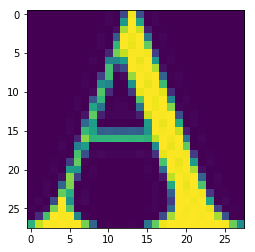

In [12]:
%matplotlib inline

file = open(train_datasets[0], 'rb')
train_A = pickle.load(file)
train_A.shape

plt.imshow(train_A[0,:,:])

In [13]:
def verify_datasets(datasets):
    for letter in datasets:
        file = open(letter, 'rb')
        dataset = pickle.load(file)
        print(letter + 'size' + str(dataset.shape[0]))
        

verify_datasets(train_datasets)
verify_datasets(test_datasets)

./notMNIST_large/A.picklesize52909
./notMNIST_large/B.picklesize52911


./notMNIST_large/C.picklesize52912
./notMNIST_large/D.picklesize52911


./notMNIST_large/E.picklesize52912
./notMNIST_large/F.picklesize52912


./notMNIST_large/G.picklesize52912
./notMNIST_large/H.picklesize52912


./notMNIST_large/I.picklesize52912
./notMNIST_large/J.picklesize52911
./notMNIST_small/A.picklesize1872
./notMNIST_small/B.picklesize1873
./notMNIST_small/C.picklesize1873
./notMNIST_small/D.picklesize1873
./notMNIST_small/E.picklesize1873
./notMNIST_small/F.picklesize1872
./notMNIST_small/G.picklesize1872
./notMNIST_small/H.picklesize1872
./notMNIST_small/I.picklesize1872
./notMNIST_small/J.picklesize1872


In [14]:
def make_arrays(nb_rows, img_size):
  if nb_rows:
    dataset = np.ndarray((nb_rows, img_size, img_size), dtype=np.float32)
    labels = np.ndarray(nb_rows, dtype=np.int32)
  else:
    dataset, labels = None, None
  return dataset, labels

def merge_datasets(pickle_files, train_size, valid_size=0):
  num_classes = len(pickle_files)
  valid_dataset, valid_labels = make_arrays(valid_size, image_size)
  train_dataset, train_labels = make_arrays(train_size, image_size)
  vsize_per_class = valid_size // num_classes
  tsize_per_class = train_size // num_classes
    
  start_v, start_t = 0, 0
  end_v, end_t = vsize_per_class, tsize_per_class
  end_l = vsize_per_class+tsize_per_class
  for label, pickle_file in enumerate(pickle_files):       
    try:
      with open(pickle_file, 'rb') as f:
        letter_set = pickle.load(f)
        # let's shuffle the letters to have random validation and training set
        np.random.shuffle(letter_set)
        if valid_dataset is not None:
          valid_letter = letter_set[:vsize_per_class, :, :]
          valid_dataset[start_v:end_v, :, :] = valid_letter
          valid_labels[start_v:end_v] = label
          start_v += vsize_per_class
          end_v += vsize_per_class
                    
        train_letter = letter_set[vsize_per_class:end_l, :, :]
        train_dataset[start_t:end_t, :, :] = train_letter
        train_labels[start_t:end_t] = label
        start_t += tsize_per_class
        end_t += tsize_per_class
    except Exception as e:
      print('Unable to process data from', pickle_file, ':', e)
      raise
    
  return valid_dataset, valid_labels, train_dataset, train_labels
            
            
train_size = 200000
valid_size = 10000
test_size = 10000

valid_dataset, valid_labels, train_dataset, train_labels = merge_datasets(
  train_datasets, train_size, valid_size)
_, _, test_dataset, test_labels = merge_datasets(test_datasets, test_size)

print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)

Training: (200000, 28, 28) (200000,)
Validation: (10000, 28, 28) (10000,)
Testing: (10000, 28, 28) (10000,)


In [15]:
def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels
train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)
valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)

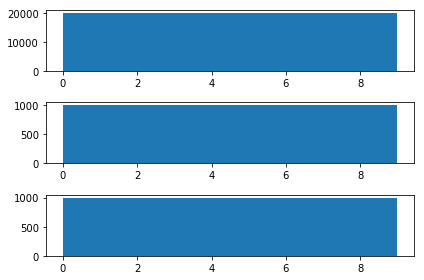

In [16]:
fig, ax = plt.subplots(3, 1)
ax[0].hist(train_labels, 10)
ax[1].hist(test_labels, 10)
ax[2].hist(valid_labels, 10)
fig.tight_layout()

In [17]:
pickle_file = os.path.join(data_root, 'notMNIST.pickle')

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'valid_dataset': valid_dataset,
    'valid_labels': valid_labels,
    'test_dataset': test_dataset,
    'test_labels': test_labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

In [18]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 690800506


In [19]:
train_dataset.flags.writeable = False
valid_dataset.flags.writeable = False
test_dataset.flags.writeable = False

train_hash = [hash(e.tobytes()) for e in train_dataset]
valid_hash = [hash(e.tobytes()) for e in valid_dataset]
test_hash = [hash(e.tobytes()) for e in test_dataset]

unique_train_hash = set(train_hash)
valid_overlap = unique_train_hash.intersection(set(valid_hash))
test_overlap = unique_train_hash.intersection(set(test_hash))

print('Duplicates inside training set: ', len(train_hash) - len(unique_train_hash))
print('Duplicates between training and validation: ', len(valid_overlap))
print('Duplicates between training and test: ', len(test_overlap))

Duplicates inside training set:  12368
Duplicates between training and validation:  999
Duplicates between training and test:  1136


In [20]:
from sklearn.linear_model import LogisticRegression

train_sample = train_dataset[:5000,:,:]
train_sample_labels = train_labels[:5000]

(samples, width, height) = train_sample.shape
train_sample = np.reshape(train_sample, (samples, width * height))

(samples, width, height) = test_dataset.shape
test_dataset_reshaped = np.reshape(test_dataset, (samples, width * height))

model = LogisticRegression(penalty='l2', C=1.0)
model.fit(train_sample, train_sample_labels)

train_score = model.score(train_sample, train_sample_labels)
test_score = model.score(test_dataset_reshaped, test_labels)
print('Training score = ', train_score)
print('Test score = ', test_score)

Training score =  0.9394
Test score =  0.8483
